### Label Data

Script written by Erik Zinn for manually labeling a subset of the unlabeled WM-811K dataset.  Labels are saved as json files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, json
from matplotlib import colors
from datetime import datetime as dt
from IPython.display import clear_output
%matplotlib inline

import cv2

# !pip install pickle5 > /dev/null
# import pickle5 as pickle

# def read_pickle(path):
#     with open(path, "rb") as fh:
#         df = pickle.load(fh)
#     return df


# Dictionary of XKCD color map
cm_xkcd = colors.XKCD_COLORS.copy()
# make a color map of fixed colors - blue passing die, fuchsia failing die
cmap = colors.ListedColormap([cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])

df = pd.read_pickle('WM_unlabeled.pkl')

# remove corrupt imgs
df['zero_count'] = df.WM.apply(lambda x: np.count_nonzero(x==0))
df = df[df['zero_count'] < 730].copy()

n = 600
ranges = list(zip([i*n+1 if i else i for i in range(5)],[i*n for i in range(1,6)]))
users = ['daniel', 'erik', 'lea', 'naga', 'scott']

In [2]:
# enter your name like you see it above
user = 'scott'

user_n = users.index(user)
rng = ranges[user_n]

# print index for users to label
print(f'index range:\t{rng}')

test_lots = df.iloc[rng[0]:rng[1]].lotName.unique().tolist()
user_prompt = "0: 'none', 1: 'Edge-Ring', 2: 'Edge-Loc', 3: 'Center',\n4: 'Loc', 5: 'Scratch', 6: 'Random', 7: 'Donut', 8: 'Near-full'\n9: CORRUPT DATA\n"
user_labels = {i:[] for i in test_lots}

# display first 5 lots to be labeled
test_lots[:5]

index range:	(2401, 3000)


['lot8526', 'lot8541', 'lot8559', 'lot8807', 'lot8833']

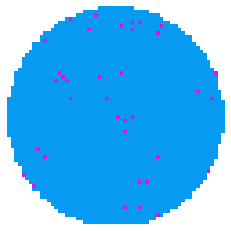

Labeling wafer #625
Wafer Lot: lot9433 (25.0)
0: 'none', 1: 'Edge-Ring', 2: 'Edge-Loc', 3: 'Center',
4: 'Loc', 5: 'Scratch', 6: 'Random', 7: 'Donut', 8: 'Near-full'
9: CORRUPT DATA
0


In [3]:
###### st_dt = dt.now()
counter = 1

for lot in test_lots:
    
    #select lot from df
    lot_df = df[df.lotName == lot]

    for i in range(min(25, lot_df.shape[0])):
        # Loop over wafers per lot and plot ith image from lot
        fig, ax = plt.subplots(1, 1, figsize=[4,4])
        ax.imshow(lot_df.WM.iloc[i], cmap=cmap)
        ax.axis('off')
        plt.show()
        
        # LDC: Alternate view of wafer maps as binary (not resized)
        #fig, ax = plt.subplots(1, 1, figsize=[4,4])
        #img = lot_df.waferMap.iloc[i]
        #ret, thresh_img = cv2.threshold(img, 1, 1, cv2.THRESH_BINARY)
        #ax.imshow(thresh_img, cmap=cmap)
        #ax.axis('off')
        #plt.show()
        
        # While loop to ensure input is valid int between 0-9
        # 9 == Corrupted data to be ignored
        while 1:
            print(f'Labeling wafer #{counter}')
            print(f'Wafer Lot: {lot_df.lotName.iloc[i]} ({lot_df.waferIndex.iloc[i]})')
            user_input = input(user_prompt)
            try:
                user_input = int(user_input)
                if user_input > -1 and user_input < 10:
                    break
                else:
                    print('Please ENTER an INT 0-9')
            except:
                print('Please ENTER an INT 0-9')

        # add input to dictionary logging user responses
        user_labels[lot].append(user_input)
        counter += 1
        
        # clear cell output so there aren't 100s of images displayed
        clear_output(wait=True)
# print(dt.now()-st_dt)

In [5]:
# with open(f"user_labels/WM_labels_{user}.json", "w") as outfile:
#     json.dump(user_labels, outfile)

### Remove Corrupt imgs

In [ ]:
test_df = df[df.zero_count > 730]
print(test_df.shape)
test_df = test_df.WM.sample(10,replace=False)

for i in range(10):
    img = test_df.iloc[i]
    fig, ax = plt.subplots(1, 1, figsize=[2,2])
    ax.imshow(img, cmap=cmap)
    ax.axis('off')
    plt.show()

730 looks like a good count to remove, the samples that aren't perfect circles I don't consider "corrupt"

### Remove lots I've already labeled 
this is a new DF with random lots selected - we don't want people relabeling the same data

In [ ]:
l1 = pd.read_json('user_labels/WM_labels_naga.json')

In [ ]:
ez_labeled_lots = l1.columns.tolist()

In [ ]:
lots = df.lotName.unique().tolist()

In [ ]:
[i for i in lots if i in ez_labeled_lots]

In [ ]:
df[df.lotName.apply(lambda x: x not in ez_labeled_lots)].shape

No lots are repeated from the data I labeled